# K-means clustering

## import library

In [773]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [774]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

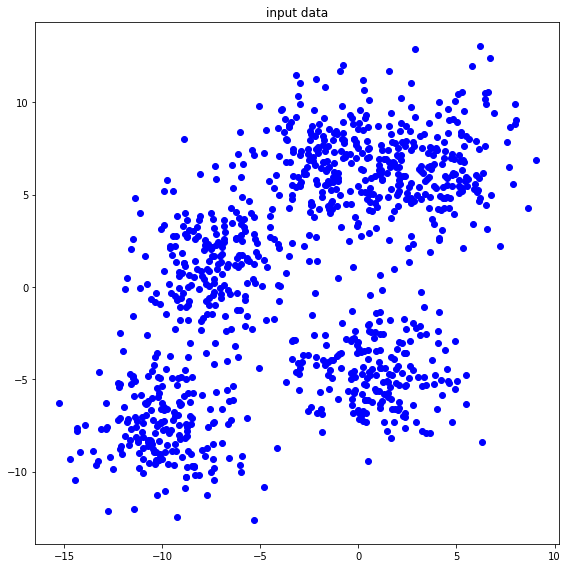

In [775]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [776]:
def compute_distance(feature, centroid):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    distance = 0

    
    tmp = (centroid - feature)**2
    distance += np.sqrt(tmp[:,0] + tmp[:,1])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [777]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    labeled_data = []

    for i in range(len(label_feature)):
        if label_feature[i] == label:
            labeled_data.append(feature[i,:])
    
    labeled_data = np.array(labeled_data)
    print(labeled_data.shape)
    
    row = np.mean(labeled_data[:,0]) if len(labeled_data) != 0 else 0
    col = np.mean(labeled_data[:,1]) if len(labeled_data) != 0 else 0
    centroid = np.c_[row,col]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [778]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature = []
    for i in range(len(distance)):
        a = distance[i].argmin()
        label_feature.append(a)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


In [779]:
# 따로 정의한 함수
def compute_loss(feature, centroids, label_feature,number_cluster):
    loss = 0

    tmp = np.c_[feature, label_feature]

    # for i,x in enumerate(feature):
    for i in range(number_cluster):
        
        distance = sum(compute_distance(tmp[tmp[:,2]==i][:,:2], centroids[i]))
        # centroid = centroids[label_feature[i]]
        # a = [x for x in range(len(label_feature)) if label_feature[x] == number_cluster]
        # distance = compute_distance(feature[],centroid)

        loss += distance
    
    loss /= len(feature)

    return loss


## the number of clusters $K = 2$

In [780]:
number_cluster          = 2
number_iteration        = 50     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [781]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

# num_cluster=2, num_feature=2
centroid = np.zeros(shape=(number_cluster,number_feature))
distance = np.zeros(shape=(number_data,number_cluster))

for iter in range(number_iteration):
    for i in range(number_cluster):
        centroid[i] = compute_centroid(feature,label_feature_02, i)
        distance[:,i] = compute_distance(feature,centroid[i])

    label_feature_02 = compute_label(distance)
    loss = compute_loss(feature,centroid,label_feature_02, number_cluster)
    
    centroid_iteration_02[iter] = centroid
    loss_iteration_02[iter] = loss
    
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

(491, 2)
(509, 2)
(462, 2)
(538, 2)
(445, 2)
(555, 2)
(484, 2)
(516, 2)
(519, 2)
(481, 2)
(544, 2)
(456, 2)
(554, 2)
(446, 2)
(558, 2)
(442, 2)
(561, 2)
(439, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)
(563, 2)
(437, 2)


## the number of clusters $K = 4$

In [782]:
number_cluster          = 4
number_iteration        = 50     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [783]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
centroid = np.zeros(shape=(number_cluster,number_feature))
distance = np.zeros(shape=(number_data,number_cluster))

for iter in range(number_iteration):
    for i in range(number_cluster):
        centroid[i] = compute_centroid(feature,label_feature_04, i)
        distance[:,i] = compute_distance(feature,centroid[i])

    label_feature_04 = compute_label(distance)
    loss = compute_loss(feature,centroid,label_feature_04, number_cluster)
    
    centroid_iteration_04[iter] = centroid
    loss_iteration_04[iter] = loss
    
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

(239, 2)
(251, 2)
(247, 2)
(263, 2)
(344, 2)
(67, 2)
(416, 2)
(173, 2)
(314, 2)
(183, 2)
(352, 2)
(151, 2)
(278, 2)
(198, 2)
(336, 2)
(188, 2)
(282, 2)
(200, 2)
(309, 2)
(209, 2)
(277, 2)
(200, 2)
(288, 2)
(235, 2)
(276, 2)
(199, 2)
(268, 2)
(257, 2)
(275, 2)
(200, 2)
(247, 2)
(278, 2)
(264, 2)
(200, 2)
(236, 2)
(300, 2)
(259, 2)
(198, 2)
(221, 2)
(322, 2)
(239, 2)
(198, 2)
(211, 2)
(352, 2)
(227, 2)
(198, 2)
(207, 2)
(368, 2)
(218, 2)
(199, 2)
(204, 2)
(379, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(380, 2)
(218, 2)
(199, 2)
(203, 2)
(3

## the number of clusters $K = 8$

In [784]:
number_cluster          = 8
number_iteration        = 10     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [785]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
centroid = np.zeros(shape=(number_cluster,number_feature))
distance = np.zeros(shape=(number_data,number_cluster))

for iter in range(number_iteration):
    for i in range(number_cluster):
        # print(feature.shape)
        centroid[i] = compute_centroid(feature,label_feature_08, i)
        distance[:,i] = compute_distance(feature,centroid[i])

    label_feature_08 = compute_label(distance)
    loss = compute_loss(feature,centroid,label_feature_08, number_cluster)
    
    centroid_iteration_08[iter] = centroid
    loss_iteration_08[iter] = loss
    
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

(122, 2)
(134, 2)
(128, 2)
(116, 2)
(126, 2)
(107, 2)
(136, 2)
(131, 2)
(136, 2)
(0,)
(364, 2)
(411, 2)
(28, 2)
(21, 2)
(40, 2)
(0,)
(140, 2)
(32, 2)
(193, 2)
(367, 2)
(21, 2)
(149, 2)
(98, 2)
(0,)
(150, 2)
(35, 2)
(176, 2)
(342, 2)
(30, 2)
(158, 2)
(87, 2)
(22, 2)
(133, 2)
(68, 2)
(180, 2)
(307, 2)
(38, 2)
(126, 2)
(91, 2)
(57, 2)
(121, 2)
(127, 2)
(185, 2)
(247, 2)
(44, 2)
(117, 2)
(87, 2)
(72, 2)
(125, 2)
(157, 2)
(188, 2)
(198, 2)
(51, 2)
(116, 2)
(84, 2)
(81, 2)
(127, 2)
(173, 2)
(189, 2)
(153, 2)
(74, 2)
(116, 2)
(84, 2)
(84, 2)
(126, 2)
(179, 2)
(189, 2)
(128, 2)
(90, 2)
(116, 2)
(87, 2)
(85, 2)
(124, 2)
(180, 2)
(190, 2)
(118, 2)
(99, 2)
(116, 2)
(88, 2)
(85, 2)


## the number of clusters $K = 16$

In [786]:
number_cluster          = 16
number_iteration        = 50     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [787]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
centroid = np.zeros(shape=(number_cluster,number_feature))
distance = np.zeros(shape=(number_data,number_cluster))

for iter in range(number_iteration):
    for i in range(number_cluster):
        centroid[i] = compute_centroid(feature,label_feature_16, i)
        distance[:,i] = compute_distance(feature,centroid[i])

    label_feature_16 = compute_label(distance)
    loss = compute_loss(feature,centroid,label_feature_16, number_cluster)
    
    centroid_iteration_16[iter] = centroid
    loss_iteration_16[iter] = loss
    
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

(65, 2)
(63, 2)
(63, 2)
(57, 2)
(68, 2)
(71, 2)
(53, 2)
(58, 2)
(78, 2)
(61, 2)
(51, 2)
(71, 2)
(46, 2)
(71, 2)
(50, 2)
(74, 2)
(175, 2)
(0,)
(337, 2)
(0,)
(2, 2)
(0,)
(62, 2)
(246, 2)
(0,)
(0,)
(0,)
(4, 2)
(138, 2)
(36, 2)
(0,)
(0,)
(135, 2)
(26, 2)
(236, 2)
(0,)
(24, 2)
(0,)
(63, 2)
(140, 2)
(0,)
(0,)
(0,)
(135, 2)
(123, 2)
(118, 2)
(0,)
(0,)
(127, 2)
(25, 2)
(198, 2)
(21, 2)
(54, 2)
(0,)
(59, 2)
(132, 2)
(0,)
(0,)
(0,)
(147, 2)
(113, 2)
(124, 2)
(0,)
(0,)
(123, 2)
(30, 2)
(194, 2)
(22, 2)
(59, 2)
(11, 2)
(63, 2)
(134, 2)
(0,)
(0,)
(0,)
(138, 2)
(103, 2)
(123, 2)
(0,)
(0,)
(121, 2)
(22, 2)
(193, 2)
(37, 2)
(72, 2)
(34, 2)
(55, 2)
(121, 2)
(7, 2)
(0,)
(0,)
(124, 2)
(91, 2)
(123, 2)
(0,)
(0,)
(117, 2)
(23, 2)
(190, 2)
(46, 2)
(80, 2)
(40, 2)
(57, 2)
(112, 2)
(7, 2)
(6, 2)
(0,)
(118, 2)
(82, 2)
(122, 2)
(0,)
(0,)
(114, 2)
(19, 2)
(190, 2)
(49, 2)
(85, 2)
(45, 2)
(58, 2)
(105, 2)
(19, 2)
(7, 2)
(4, 2)
(113, 2)
(75, 2)
(117, 2)
(0,)
(0,)
(111, 2)
(17, 2)
(189, 2)
(55, 2)
(86, 2)
(49, 2)
(

---

---

## functions for presenting the results

---

---

In [788]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [789]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [790]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [791]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [792]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [793]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [794]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [795]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [796]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # 처음 centroid
    x = centroid_iteration_02[0,:,0]
    y = centroid_iteration_02[0,:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    # 마지막 centroid
    x = centroid_iteration_02[len(centroid_iteration_02)-1,:,0]
    y = centroid_iteration_02[len(centroid_iteration_02)-1,:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [797]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # 처음 centroid
    x = centroid_iteration_04[0,:,0]
    y = centroid_iteration_04[0,:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    # 마지막 centroid
    x = centroid_iteration_04[len(centroid_iteration_04)-1,:,0]
    y = centroid_iteration_04[len(centroid_iteration_04)-1,:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [798]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    # 처음 centroid
    x = centroid_iteration_08[0,:,0]
    y = centroid_iteration_08[0,:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    # 마지막 centroid
    x = centroid_iteration_08[len(centroid_iteration_08)-1,:,0]
    y = centroid_iteration_08[len(centroid_iteration_08)-1,:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [799]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # 처음 centroid
    x = centroid_iteration_16[0,:,0]
    y = centroid_iteration_16[0,:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    # 마지막 centroid
    x = centroid_iteration_16[len(centroid_iteration_16)-1,:,0]
    y = centroid_iteration_16[len(centroid_iteration_16)-1,:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [800]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [801]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [802]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [803]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  5.0930769025
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  2.8867264896
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  2.1329354367
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  1.6464368283
**************************************************
## [RESULT 05]
**************************************************


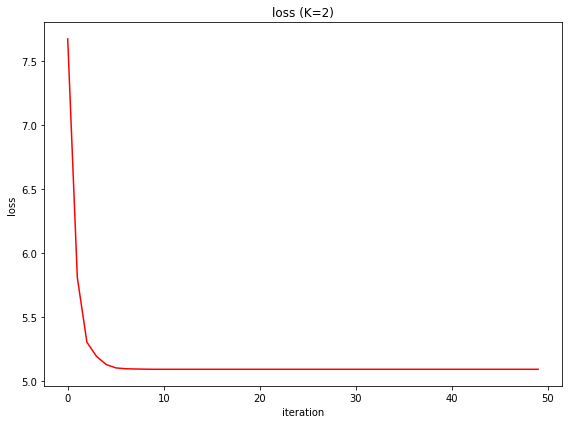

**************************************************
## [RESULT 06]
**************************************************


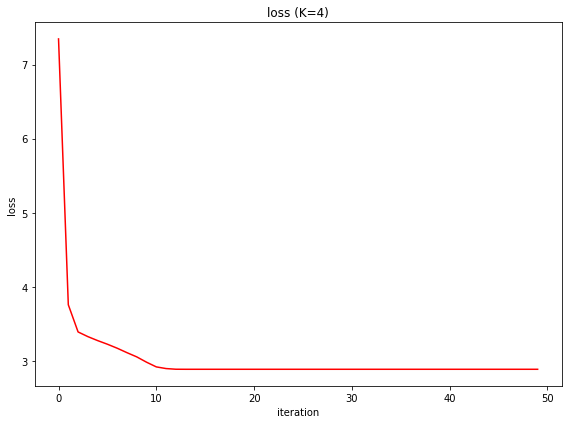

**************************************************
## [RESULT 07]
**************************************************


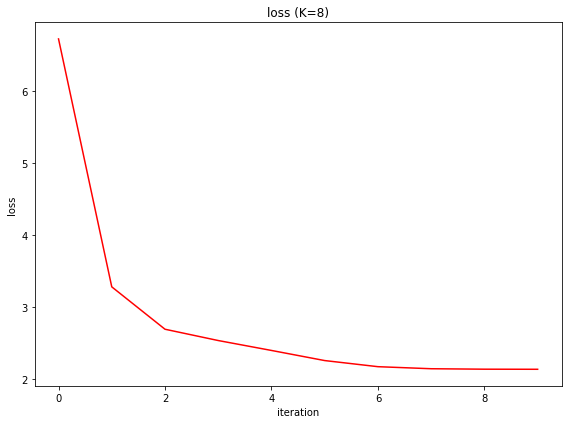

**************************************************
## [RESULT 08]
**************************************************


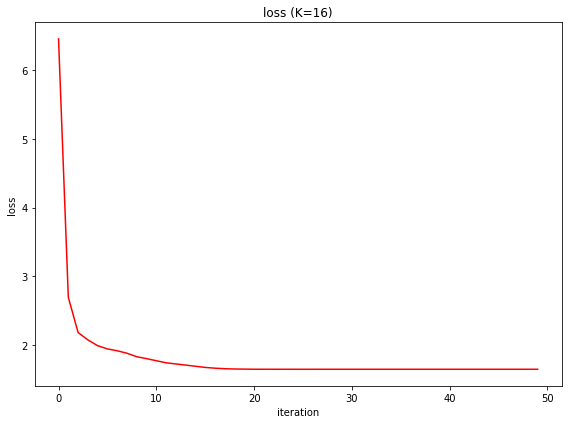

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************
**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


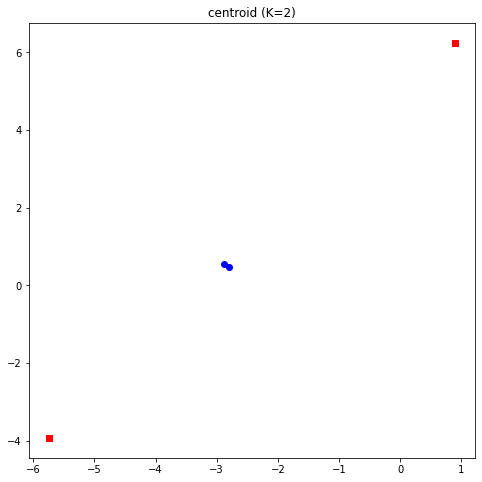

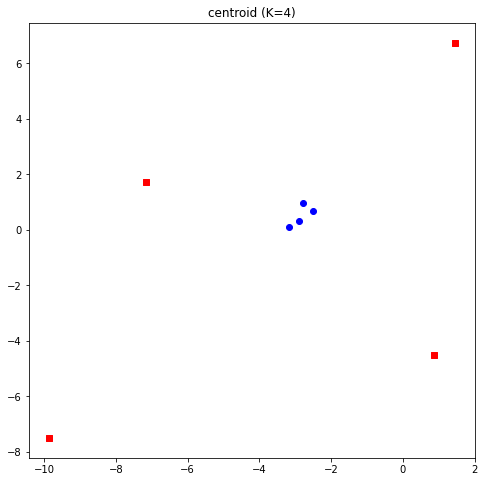

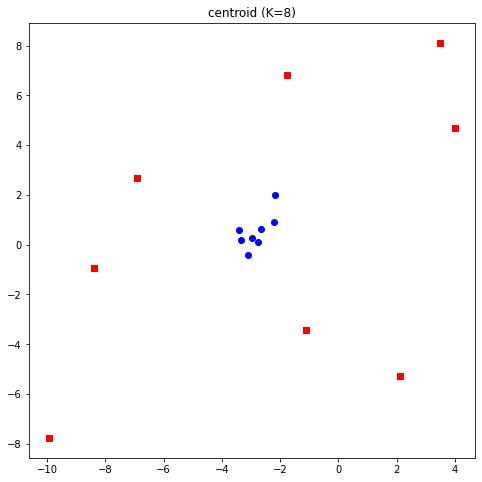

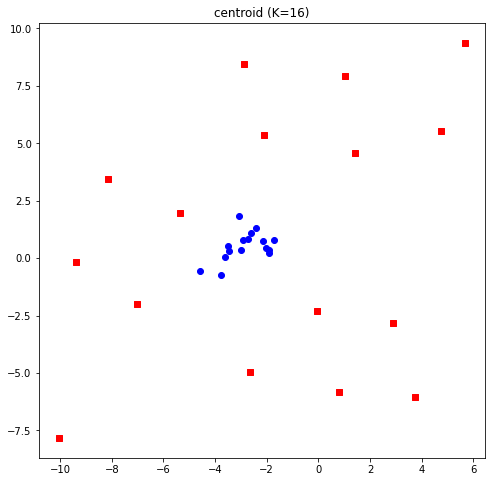

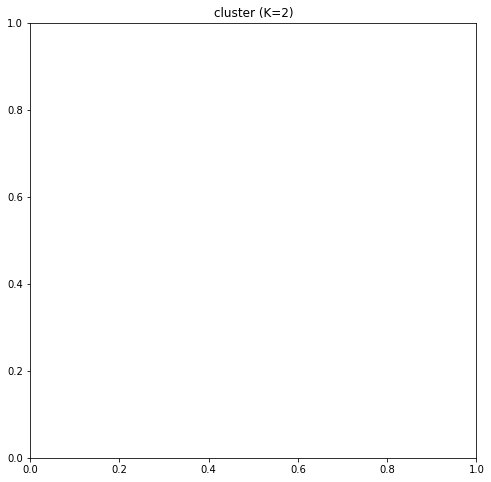

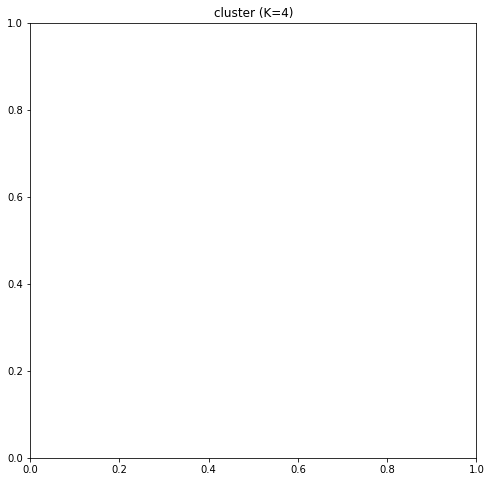

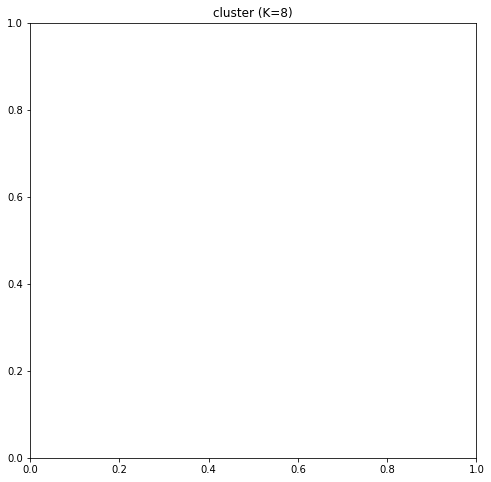

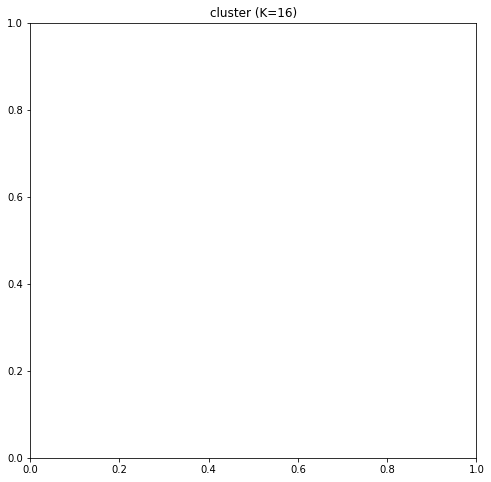

In [804]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)